In [18]:
# Import all the libraries for Data Analysis, Visualisation & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Read Data

In [19]:
df= pd.read_csv('Leads.csv')
df.head().T

,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0


In [20]:
df.shape

(9240, 37)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [22]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [23]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Data Cleaning 

### 'Select' value treatment

#### As mentioned in the Problem Statement, many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select.

In [24]:
# List of columns having 'Select' as value

select_val = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(select_val)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [25]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [26]:
# Checking if all 'Select' values have been handled in the columns
select_val = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(select_val)

[]


### Handling Missing Values

In [27]:
100*(df.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### Drop Columns with more than 40% Null Values

In [28]:
# Calculate the percentage of NA values in each column
na_percentage = (df.isna().sum() / len(df)) * 100

# Filter columns with more than 70% NA values
columns_to_drop = na_percentage[na_percentage > 40].index

# Drop the selected columns
df = df.drop(columns=columns_to_drop)

# Now, 'df' contains only columns with less than or equal to 40% NA values


In [29]:
df.shape

(9240, 30)

In [30]:
# Checking the percentage of null values for remaining columns

100*(df.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

## Feature Engineering 

#### CITY

In [32]:
# checking a few variables 

df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

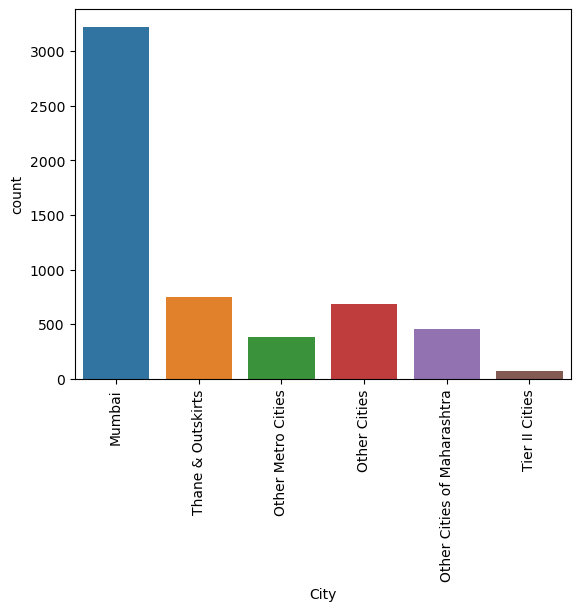

In [38]:
sns.countplot(df.City)
plt.xticks(rotation=90)
plt.show()

In [40]:
#Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.
df['City'] = df['City'].replace(np.nan, 'Mumbai')

#### Specialization

In [41]:
df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [42]:
df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

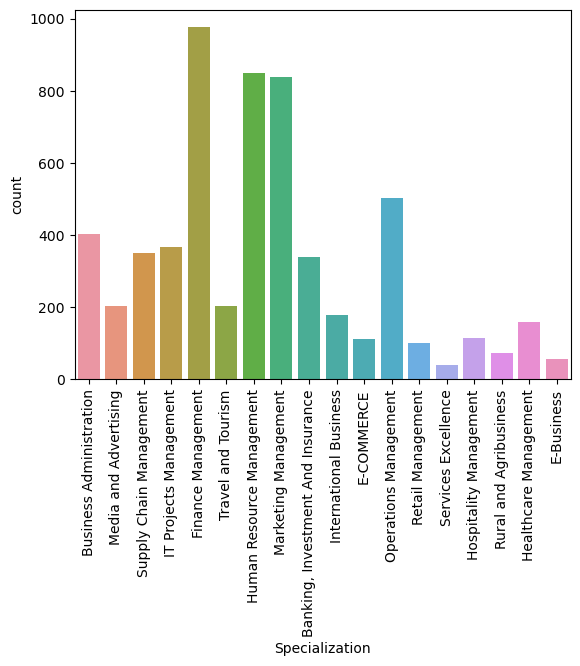

In [43]:
sns.countplot(df.Specialization)
plt.xticks(rotation = 90)
plt.show()

In [44]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list, may not have any specialization or is a student. Hence we can make a category "Others" for missing values.


df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

In [45]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Tags

In [46]:
df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [47]:
df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

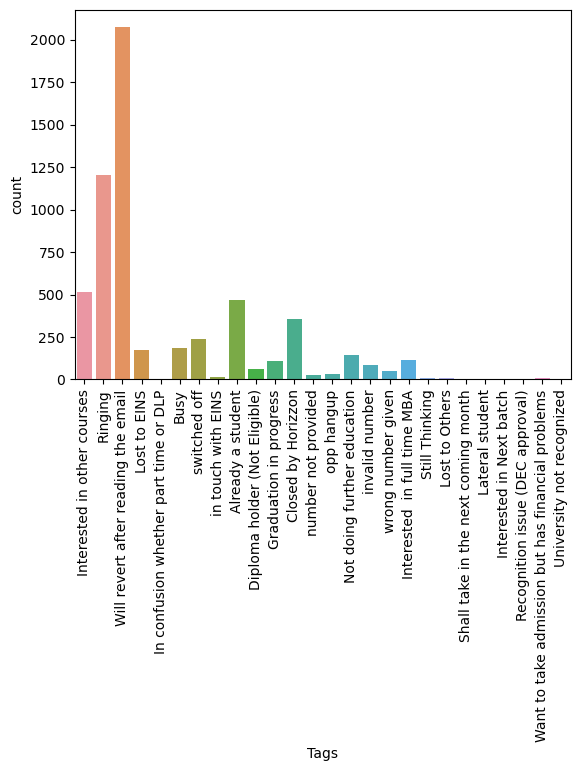

In [48]:
sns.countplot(df.Tags)
plt.xticks(rotation = 90)
plt.show()

In [49]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

#### What matters most to you in choosing a course

In [51]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [52]:

df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

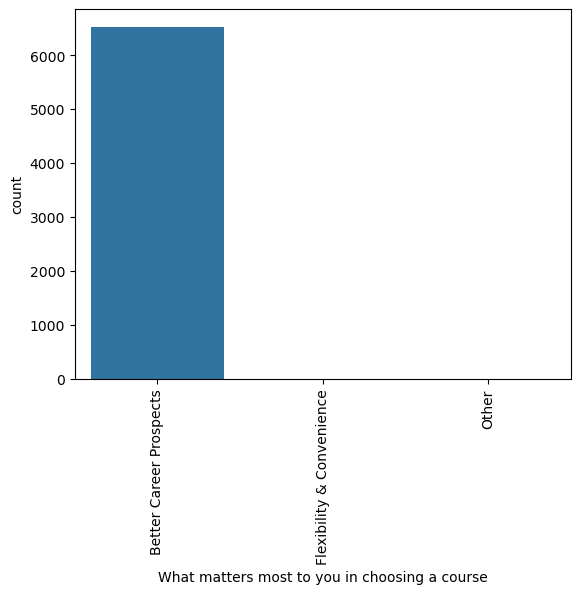

In [53]:
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.show()

In [54]:
# Blanks in the this column may be imputed by 'Better Career Prospects'.
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

#### What is your current occupation

In [55]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [56]:
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

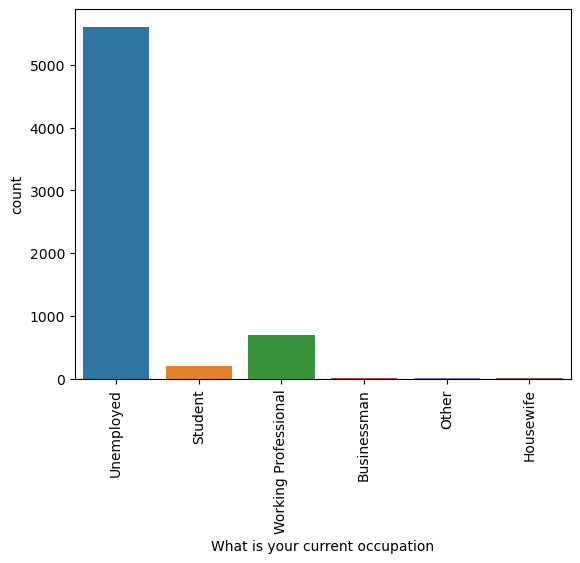

In [57]:
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [58]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

#### Country

In [59]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [60]:
df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [64]:
# Country is India for most values so let's impute the same in missing values.
df['Country'] = df['Country'].replace(np.nan, 'India')

In [65]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [66]:
# Rest missing values are under 2% so we can drop these rows.
df.dropna(inplace = True)

In [67]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## EDA

#### Univariate Analysis

##### Converted

In [68]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

##### Lead Origin

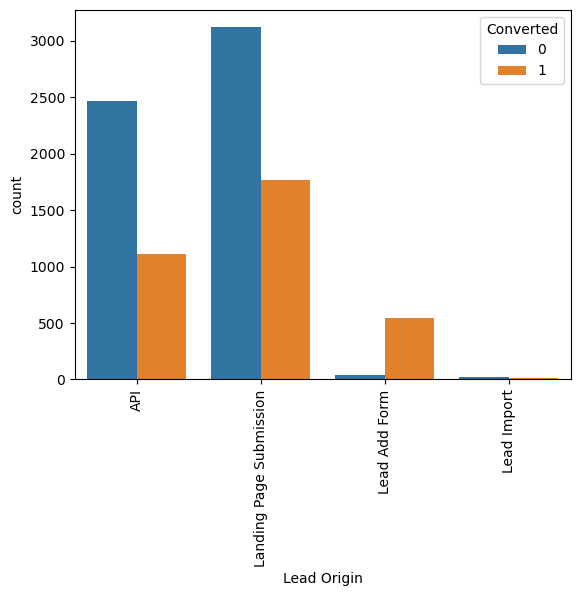

In [70]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

##### Lead Source

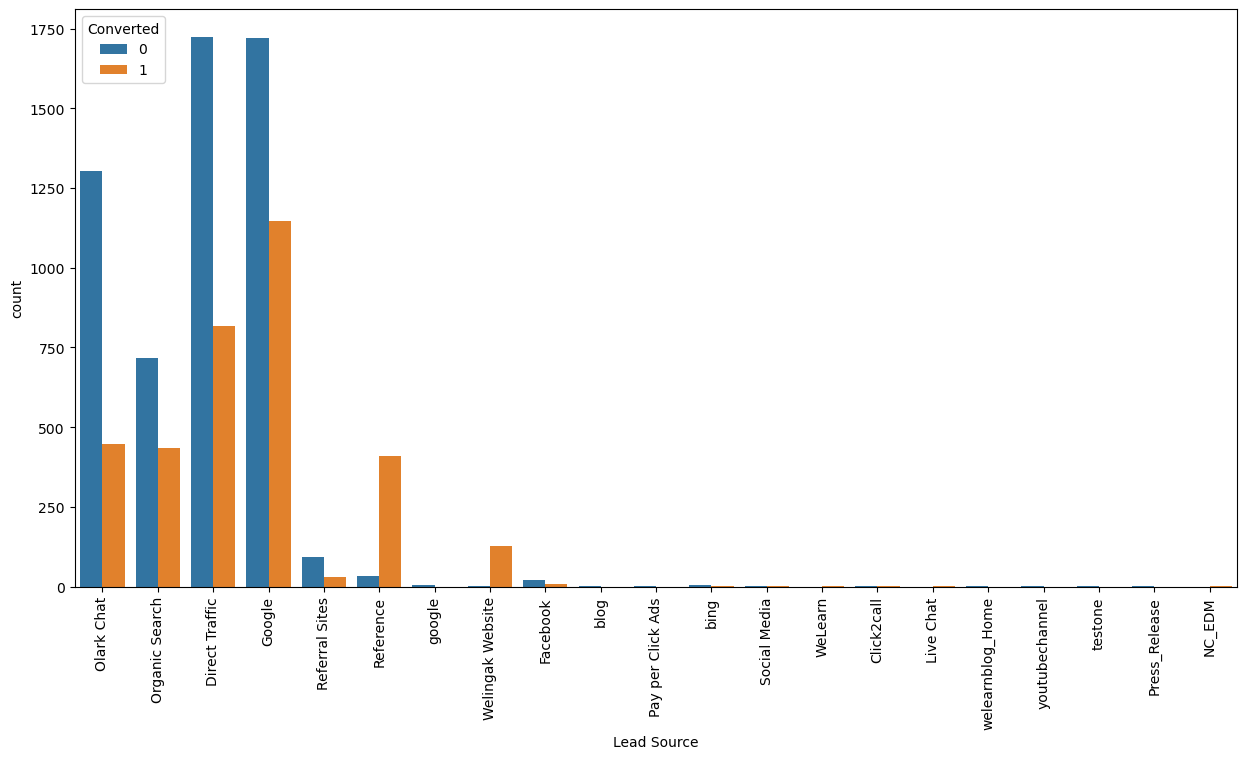

In [73]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [74]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

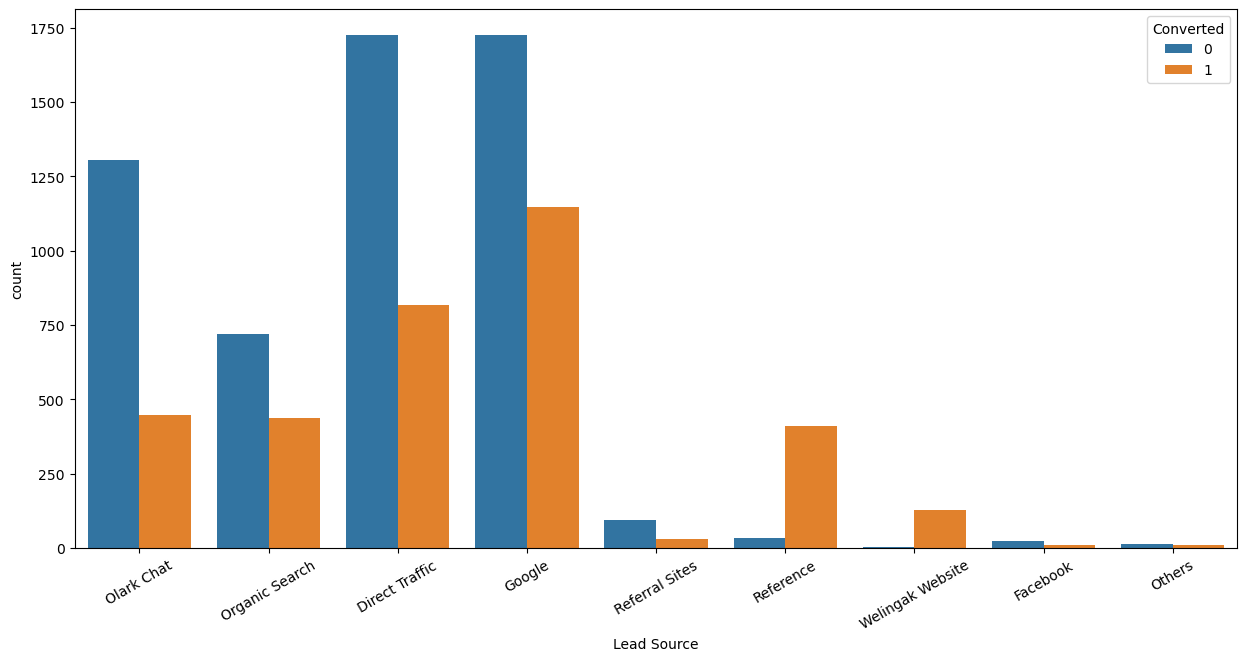

In [77]:
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 30)
plt.show()

##### Do Not Email & Do Not Call

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

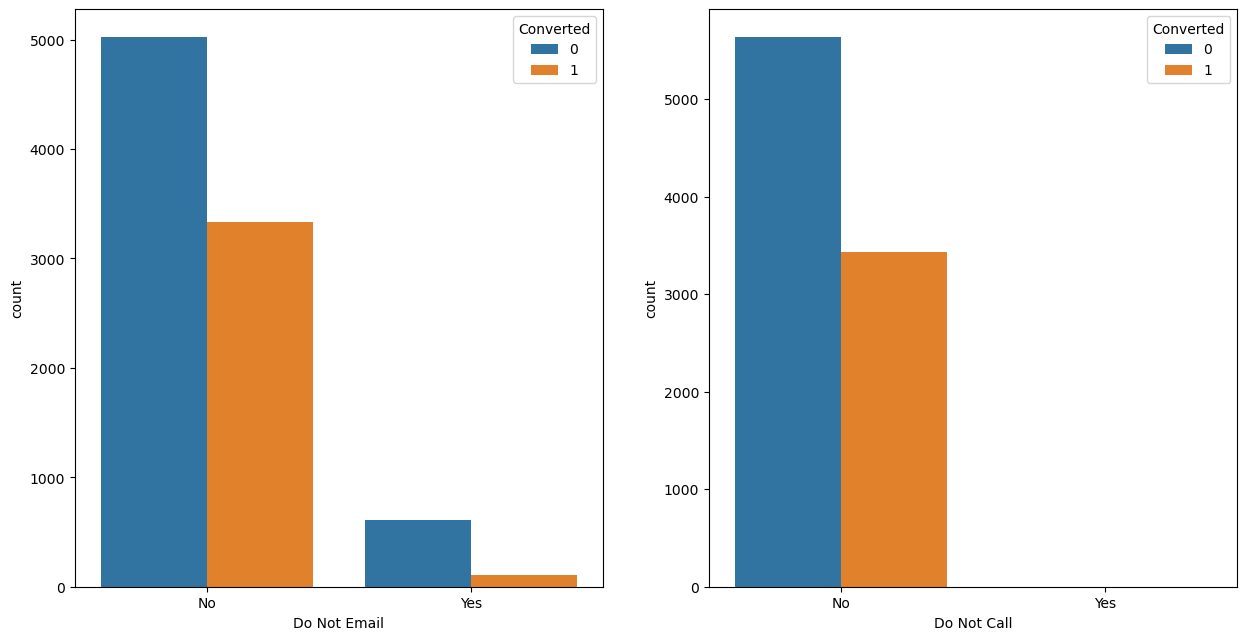

In [78]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])

##### Total Visits

In [79]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

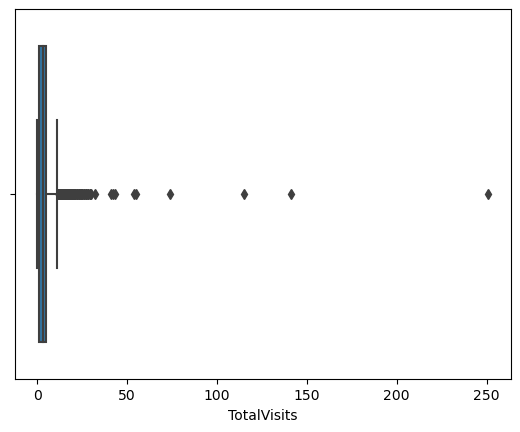

In [80]:
sns.boxplot(df['TotalVisits'])

In [83]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]


<AxesSubplot:xlabel='TotalVisits'>

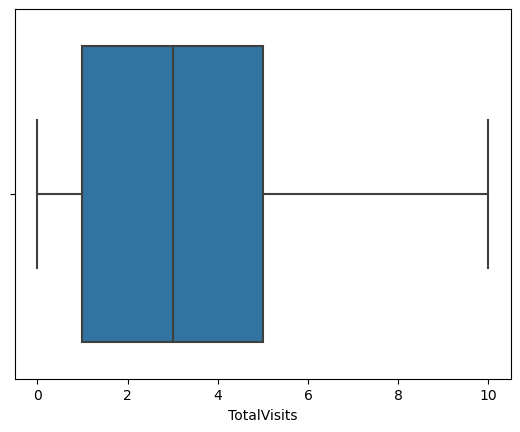

In [84]:
sns.boxplot(df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

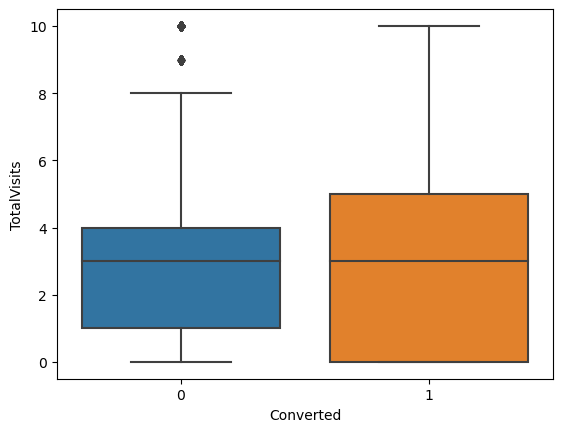

In [85]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

##### Total time spent on website

In [86]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

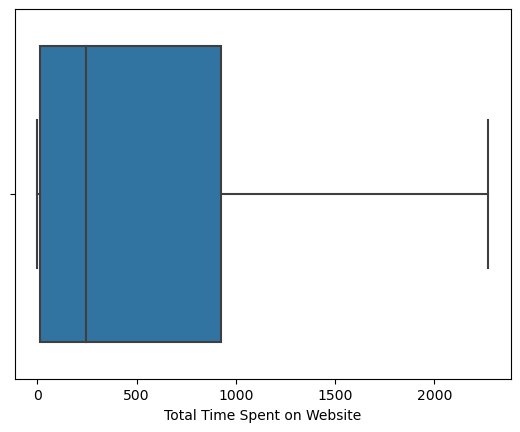

In [87]:
sns.boxplot(df['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

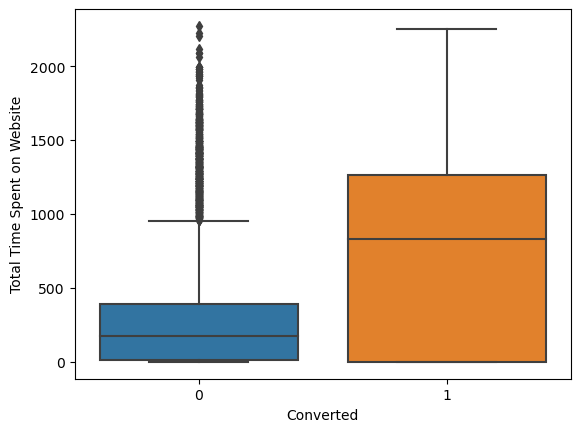

In [88]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

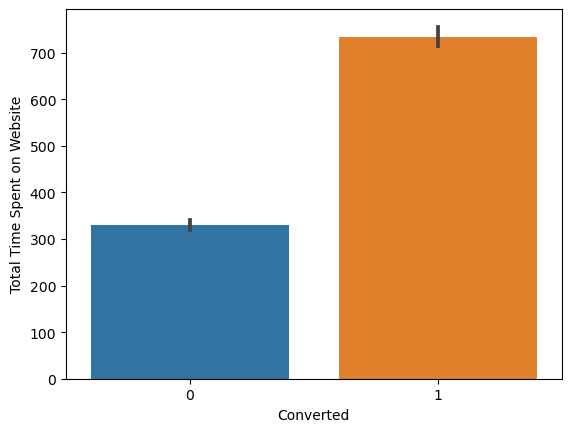

In [89]:
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

##### Page views per visit

In [90]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

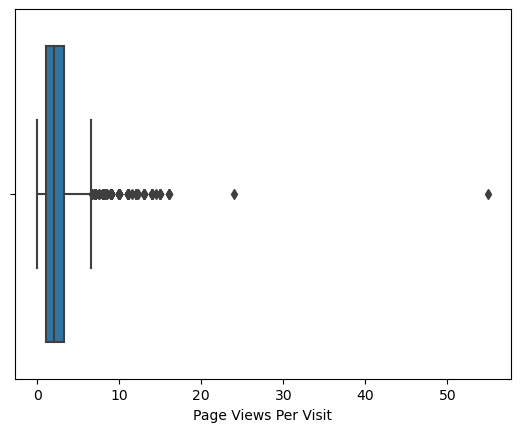

In [91]:
sns.boxplot(df['Page Views Per Visit'])

In [92]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

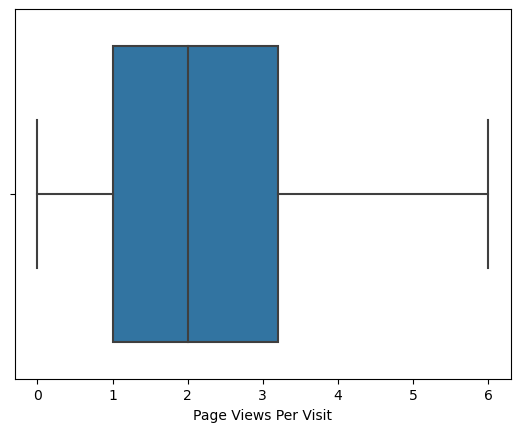

In [93]:
sns.boxplot(df['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

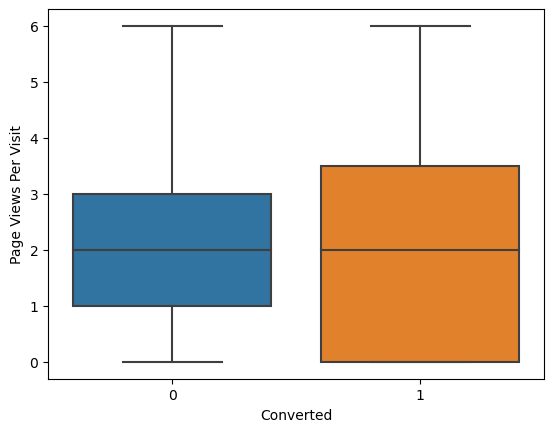

In [94]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

##### Last Activity

In [95]:
df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

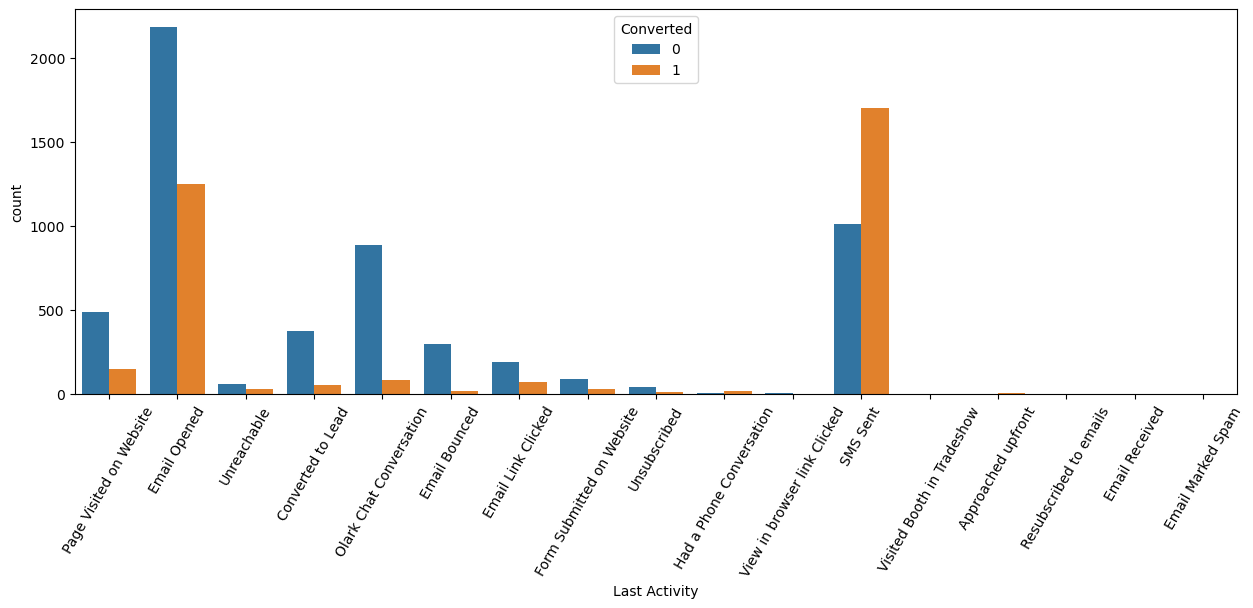

In [96]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 60)
plt.show()

In [97]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

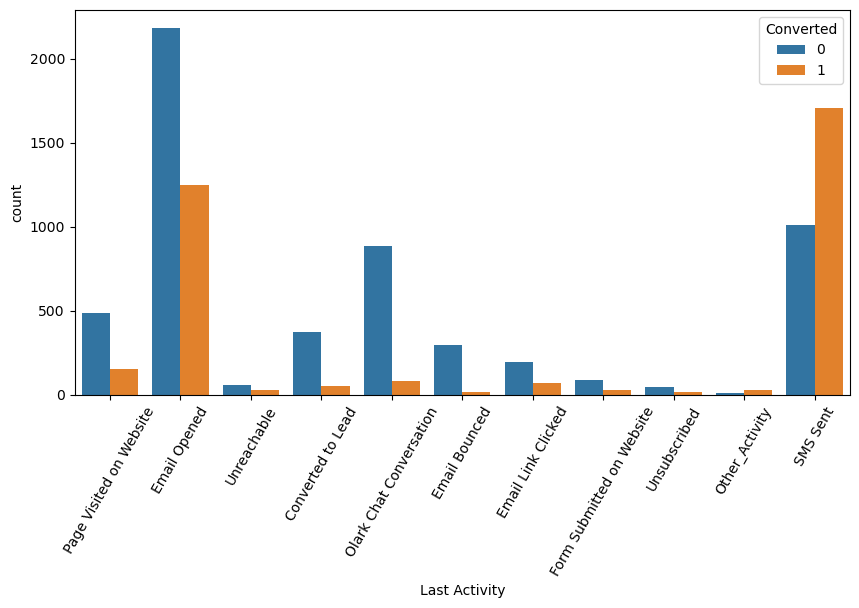

In [98]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 60)
plt.show()

##### Country

In [99]:
df.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

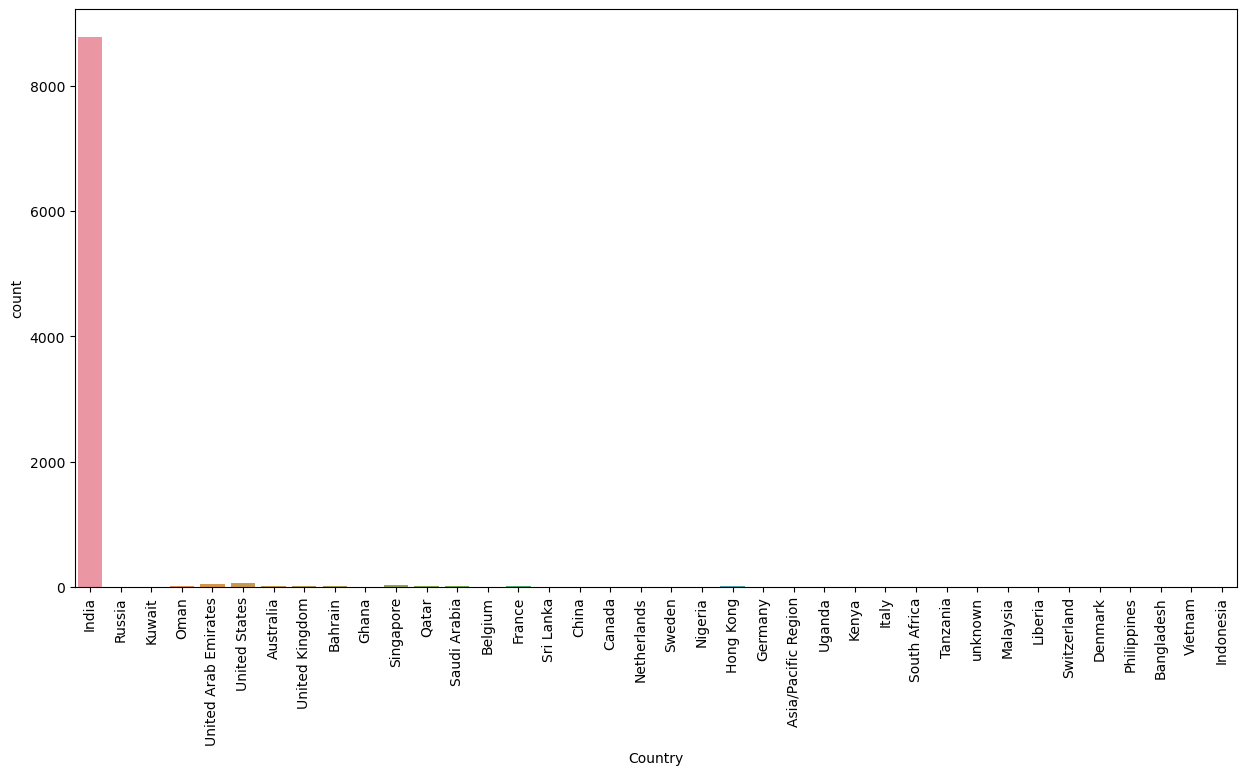

In [101]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(df.Country)
plt.xticks(rotation = 90)
plt.show()

##### Specialization

In [102]:
df.Specialization.describe()


count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [103]:
df['Specialization'] = df['Specialization'].replace(['Others'], 'Other_Specialization')

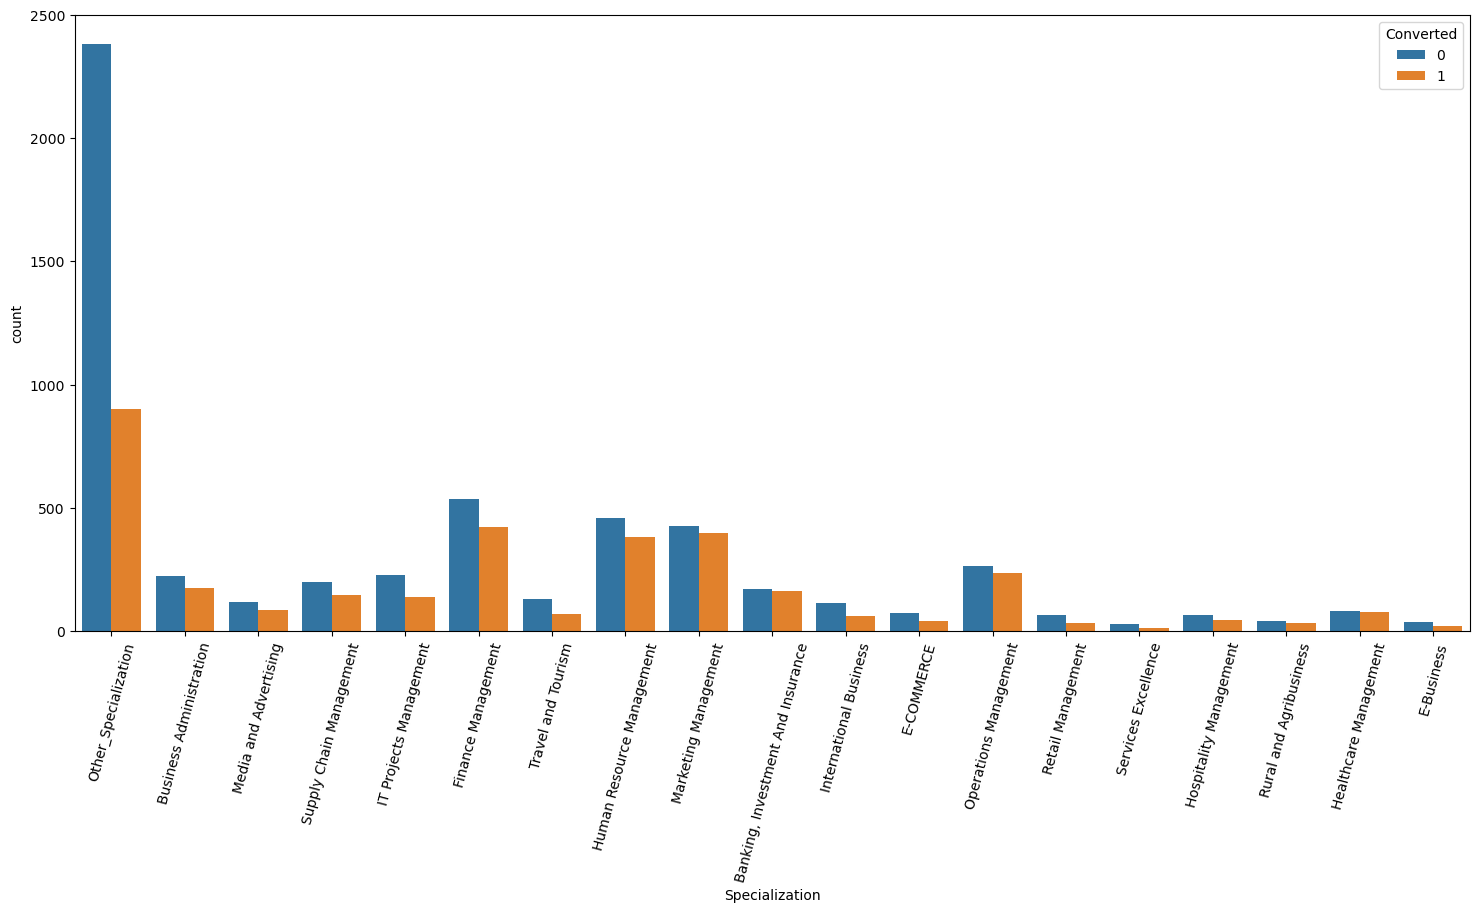

In [104]:
fig, axs = plt.subplots(figsize = (18,8))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.xticks(rotation = 75)
plt.show()

##### Occupation

In [105]:
df['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

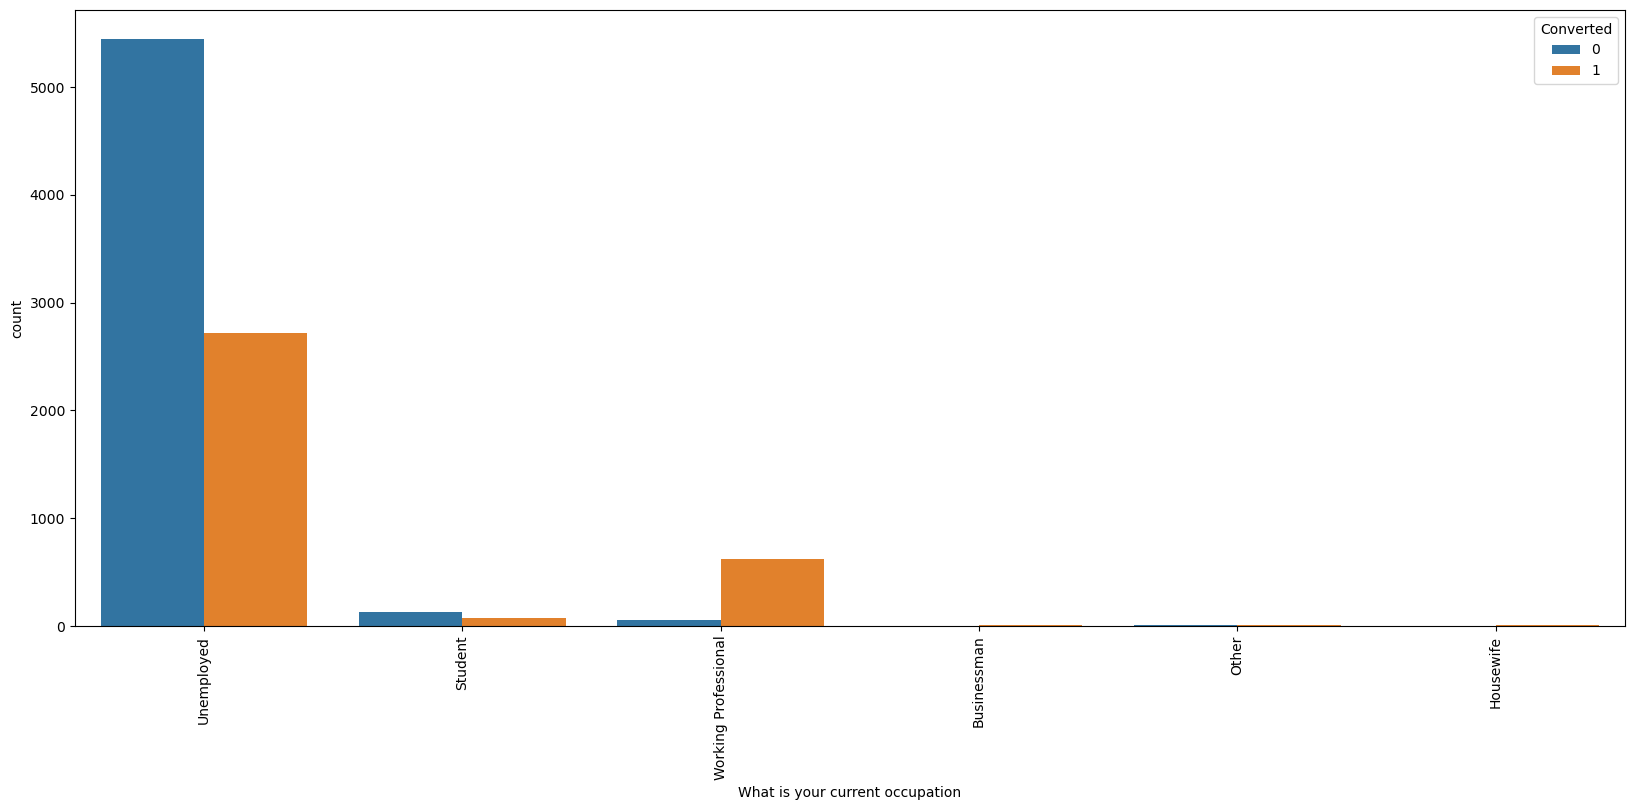

In [107]:
fig, axs = plt.subplots(figsize = (20,8))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

##### What matters most to you in choosing a course

In [108]:
df['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

##### Search

In [109]:
df.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

##### Magazine

In [110]:
df.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

##### Newspaper Article

In [111]:
df['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

##### X Education Forums

In [112]:
df['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

##### Newspaper

In [113]:
df['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

##### Digital Advertisement

In [114]:
df['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

##### Through Recommendations

In [115]:
df['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

##### Receive More Updates About Our Courses

In [116]:
df['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

##### Tags

In [117]:
df.Tags.describe()


count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

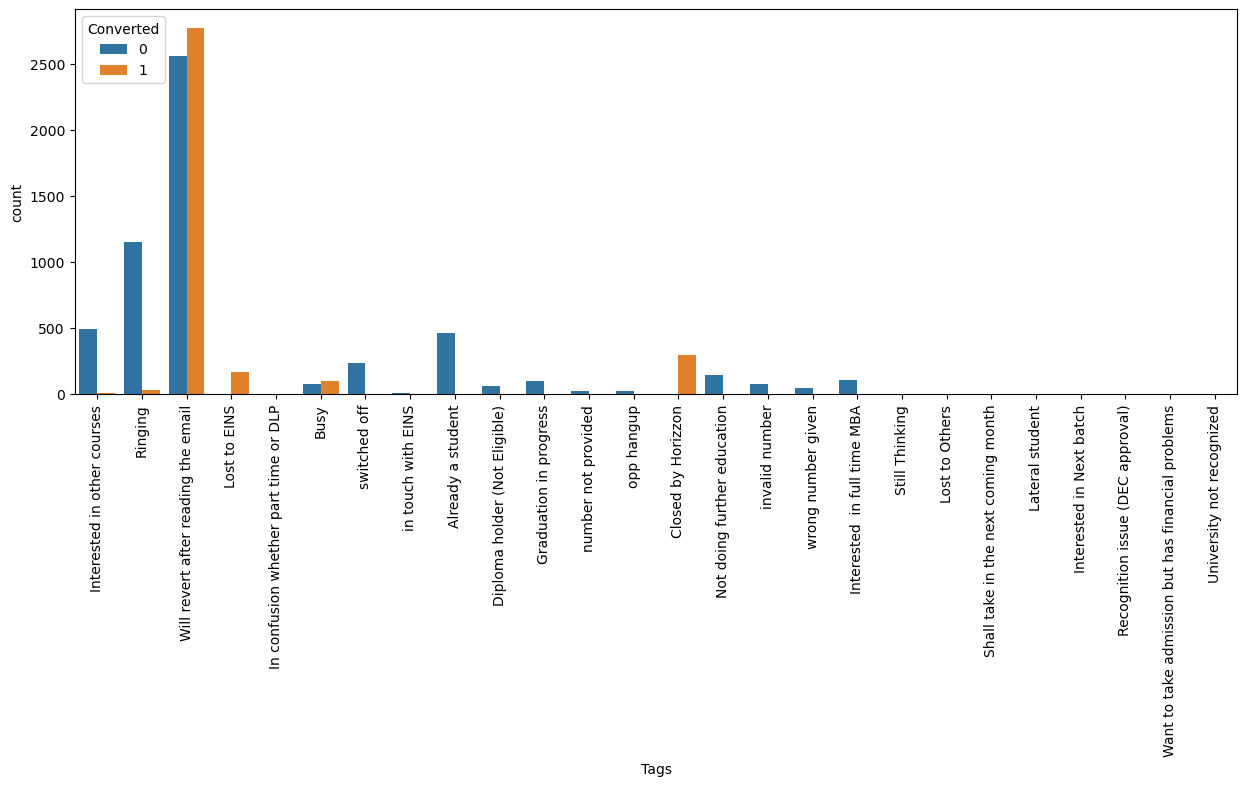

In [118]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [119]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

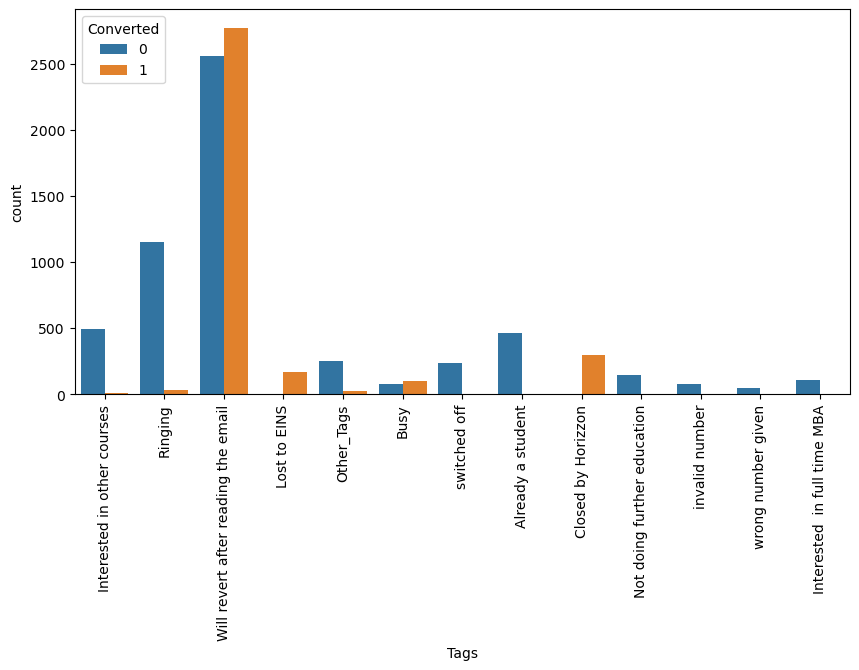

In [120]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

##### City

In [122]:
df['City'].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

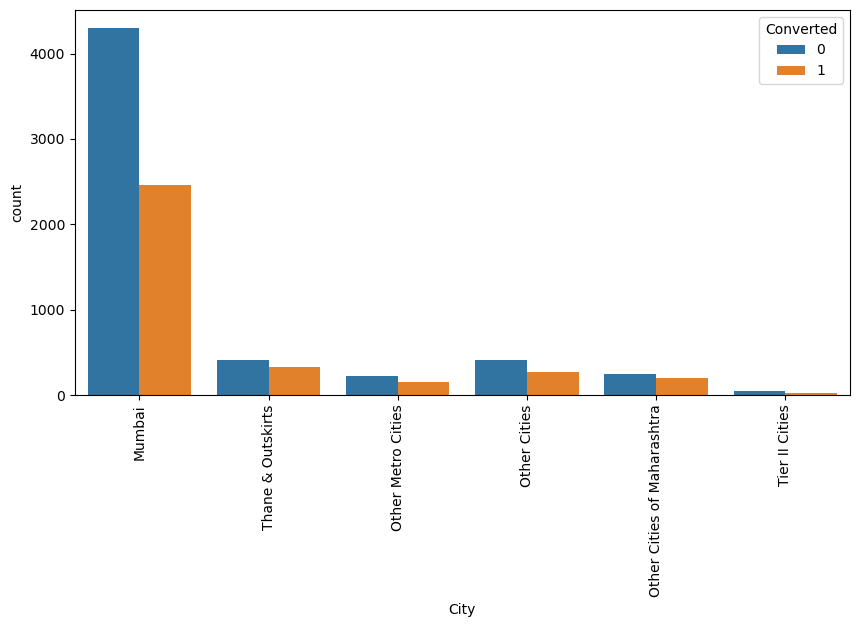

In [123]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

##### Last Notable Activity

In [124]:
df['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

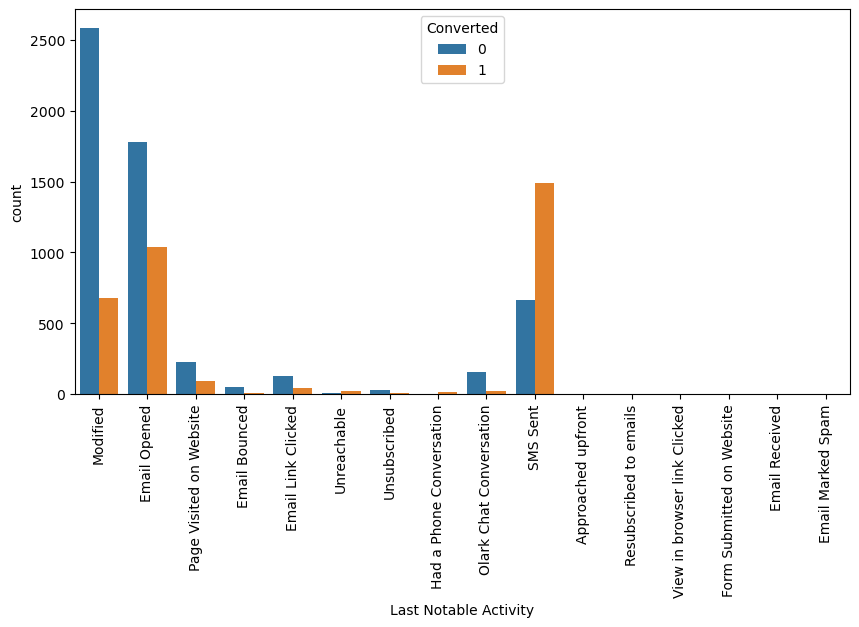

In [125]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [127]:
df = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call','Do Not Email'],1)


In [129]:
df.shape

(9074, 13)

In [130]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


## Data Preparation

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [132]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [133]:
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [134]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','City','Last Notable Activity'], axis = 1)

In [135]:
df.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [136]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)


In [137]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [138]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [139]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Model Building

#### Running Your First Training Model

In [141]:
import statsmodels.api as sm

In [142]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1578.5
Date:                Sat, 16 Sep 2023   Deviance:                       3157.0
Time:                        10:21:52   Pearson chi2:                 1.27e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5665
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.8913   2.16e+05   9.21e-05      1.000   -4.23e+05    4.23e+05
TotalVisits                                              0.1573      0.076      2.080      0.038       0.009       0.305
Total Time Spent on Website                              1.1751      0.056     20.870      0.000       1.065       1.285
Page Views Per Visit                                    -0.2542      0.084     -3.040      0.002      -0.418      -0.090
Lead Origin_Landing Page Submission                     -1.2885      0.186     -6.936      0.000      -1.653      -0.924
Lead Origin_Lead Add Form                                0.7113      1.267      0.561      0.575      -1.773       3.195
Lead Origin_Lead Import                                 28.2085   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -26.7855   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2236      0.130      1.717      0.086      -0.032       0.479
Lead Source_Olark Chat                                   0.8607      0.209      4.122      0.000       0.451       1.270
Lead Source_Organic Search                               0.2814      0.178      1.585      0.113      -0.067       0.629
Lead Source_Others                                       0.3201      0.755      0.424      0.671      -1.159       1.799
Lead Source_Reference                                    2.0343      1.305      1.559      0.119      -0.524       4.593
Lead Source_Referral Sites                               0.0684      0.427      0.160      0.873      -0.768       0.905
Lead Source_Welingak Website                             4.0412      1.462      2.764      0.006       1.176       6.907
Last Activity_Email Bounced                             -2.4181      0.770     -3.138      0.002      -3.928      -0.908
Last Activity_Email Link Clicked                         0.8425      0.557      1.514      0.130      -0.248       1.933
Last Activity_Email Opened                              -0.0081      0.331     -0.025      0.980      -0.656       0.640
Last Activity_Form Submitted on Website                  0.0325      0.522      0.062      0.950      -0.991       1.057
Last Activity_Olark Chat Conversation                   -0.5764      0.341     -1.689      0.091      -1.245       0.093
Last Activity_Other_Activity                             1.3105      1.054      1.244      0.214      -0.755       3.376
Last Activity_Page Visited on Website                    0.1239      0.379      0.327      0.744      -0.619       0.867
Last Activity_SMS Sent                                   0

#### Feature Selection Using RFE

In [144]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)  # Select 15 features
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [145]:
rfe.support_

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False])

In [146]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 40),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', False, 14),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 63),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 65),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 48),
 ('Last Activity_Form Submitted on Website', False, 56),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 60),
 ('Last Activity_SMS Sent', False, 7),
 ('Last Activity_Unreachable', False, 9),
 ('Las

In [147]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Other_Activity', 'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [148]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Bus

## Assessing the model with StatsModels

In [149]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.9
Date:                Sat, 16 Sep 2023   Deviance:                       3969.9
Time:                        10:25:02   Pearson chi2:                 1.16e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5074
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6050      0.245     -2.469      0.014      -1.085      -0.125
Lead Origin_Landing Page Submission           -1.4601      0.147     -9.905      0.000      -1.749      -1.171
Lead Origin_Lead Add Form                      1.6722      0.317      5.275      0.000       1.051       2.293
Lead Source_Welingak Website                   2.5246      0.804      3.140      0.002       0.949       4.100
Last Activity_Email Bounced                   -2.0719      0.389     -5.328      0.000      -2.834      -1.310
Last Activity_Other_Activity                   1.8552      0.548      3.386      0.001       0.781       2.929
Specialization_Other_Specialization           -2.1229      0.150    -14.132      0.000      -2.417      -1.828
What is your current occupation_Unemployed    -2.2980      0.188    -12.254      0.000      -2.666      -1.930
Tags_Busy                                      3.0245      0.307      9.841      0.000       2.422       3.627
Tags_Closed by Horizzon                        8.3941      0.743     11.300      0.000       6.938       9.850
Tags_Lost to EINS                              8.3879      0.747     11.236      0.000       6.925       9.851
Tags_Ringing                                  -1.1758      0.317     -3.711      0.000      -1.797      -0.555
Tags_Will revert after reading the email       3.7678      0.205     18.423      0.000       3.367       4.169
Tags_invalid number                          -21.6414   1.47e+04     -0.001      0.999   -2.88e+04    2.88e+04
Tags_switched off                             -1.1928      0.560     -2.132      0.033      -2.290      -0.096
Last Notable Activity_SMS Sent                 2.8236      0.114     24.773      0.000       2.600       3.047
==============================================================================================================
"""

In [161]:
col1 = col.drop('Tags_invalid number',1)

In [162]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.6
Date:                Sat, 16 Sep 2023   Deviance:                       3977.2
Time:                        10:49:19   Pearson chi2:                 1.18e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5068
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6811      0.248     -2.747      0.006      -1.167      -0.195
Lead Origin_Landing Page Submission           -1.4757      0.148     -9.972      0.000      -1.766      -1.186
Lead Origin_Lead Add Form                      1.6830      0.318      5.290      0.000       1.059       2.307
Lead Source_Welingak Website                   2.5110      0.804      3.122      0.002       0.935       4.087
Last Activity_Email Bounced                   -2.0733      0.389     -5.326      0.000      -2.836      -1.310
Last Activity_Other_Activity                   1.8692      0.553      3.382      0.001       0.786       2.953
Specialization_Other_Specialization           -2.1317      0.151    -14.132      0.000      -2.427      -1.836
What is your current occupation_Unemployed    -2.3388      0.190    -12.330      0.000      -2.711      -1.967
Tags_Busy                                      3.1675      0.304     10.410      0.000       2.571       3.764
Tags_Closed by Horizzon                        8.5221      0.742     11.478      0.000       7.067       9.977
Tags_Lost to EINS                              8.5176      0.746     11.416      0.000       7.055       9.980
Tags_Ringing                                  -1.0265      0.313     -3.275      0.001      -1.641      -0.412
Tags_Will revert after reading the email       3.8982      0.203     19.226      0.000       3.501       4.296
Tags_switched off                             -1.0400      0.557     -1.866      0.062      -2.133       0.053
Last Notable Activity_SMS Sent                 2.7994      0.113     24.839      0.000       2.578       3.020
==============================================================================================================
"""

In [183]:
col2 = col.drop('Tags_invalid number',1)

In [184]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.6
Date:                Sat, 16 Sep 2023   Deviance:                       3977.2
Time:                        11:26:16   Pearson chi2:                 1.18e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5068
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6811      0.248     -2.747      0.006      -1.167      -0.195
Lead Origin_Landing Page Submission           -1.4757      0.148     -9.972      0.000      -1.766      -1.186
Lead Origin_Lead Add Form                      1.6830      0.318      5.290      0.000       1.059       2.307
Lead Source_Welingak Website                   2.5110      0.804      3.122      0.002       0.935       4.087
Last Activity_Email Bounced                   -2.0733      0.389     -5.326      0.000      -2.836      -1.310
Last Activity_Other_Activity                   1.8692      0.553      3.382      0.001       0.786       2.953
Specialization_Other_Specialization           -2.1317      0.151    -14.132      0.000      -2.427      -1.836
What is your current occupation_Unemployed    -2.3388      0.190    -12.330      0.000      -2.711      -1.967
Tags_Busy                                      3.1675      0.304     10.410      0.000       2.571       3.764
Tags_Closed by Horizzon                        8.5221      0.742     11.478      0.000       7.067       9.977
Tags_Lost to EINS                              8.5176      0.746     11.416      0.000       7.055       9.980
Tags_Ringing                                  -1.0265      0.313     -3.275      0.001      -1.641      -0.412
Tags_Will revert after reading the email       3.8982      0.203     19.226      0.000       3.501       4.296
Tags_switched off                             -1.0400      0.557     -1.866      0.062      -2.133       0.053
Last Notable Activity_SMS Sent                 2.7994      0.113     24.839      0.000       2.578       3.020
==============================================================================================================
"""

In [185]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.354937
1012    0.078443
9226    0.002070
4750    0.900427
7987    0.982399
1281    0.900427
2880    0.354937
4971    0.950119
7536    0.354937
1248    0.003982
dtype: float64

In [186]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35493746, 0.07844264, 0.00206997, 0.90042706, 0.98239942,
       0.90042706, 0.35493746, 0.95011858, 0.35493746, 0.00398167])

In [187]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.354937,3009
1,0,0.078443,1012
2,0,0.002070,9226
3,1,0.900427,4750
4,1,0.982399,7987


In [188]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.354937,3009,0
1,0,0.078443,1012,0
2,0,0.002070,9226,0
3,1,0.900427,4750,1
4,1,0.982399,7987,1


In [189]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3737  168]
 [ 637 1809]]


In [190]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8732483073531727


## Checking VIF

In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [192]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Welingak Website,1.34
8,Tags_Closed by Horizzon,1.26
13,Last Notable Activity_SMS Sent,1.16
7,Tags_Busy,1.14
9,Tags_Lost to EINS,1.09
3,Last Activity_Email Bounced,1.07
12,Tags_switched off,1.05
4,Last Activity_Other_Activity,1.01
1,Lead Origin_Lead Add Form,0.69
11,Tags_Will revert after reading the email,0.17


## Metrics beyond simply accuracy

In [193]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [194]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7395748160261651

In [195]:
# Let us calculate specificity
TN / float(TN+FP)

0.9569782330345711

In [196]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.043021766965428934


In [197]:
# positive predictive value 
print (TP / float(TP+FP))

0.9150227617602428


In [198]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8543667123914037


## Plotting the ROC Curve


In [199]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [200]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

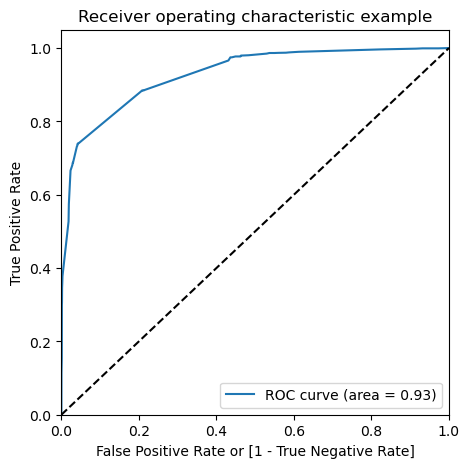

In [203]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding Optimal Cutoff Point

In [204]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.354937,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.078443,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.002070,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.900427,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.982399,7987,1,1,1,1,1,1,1,1,1,1,1


In [205]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.706975  0.977105  0.537772
0.2   0.2  0.721619  0.974652  0.563124
0.3   0.3  0.825539  0.884301  0.788732
0.4   0.4  0.872618  0.740392  0.955442
0.5   0.5  0.873248  0.739575  0.956978
0.6   0.6  0.873721  0.737939  0.958771
0.7   0.7  0.872146  0.731807  0.960051
0.8   0.8  0.859865  0.681521  0.971575
0.9   0.9  0.806330  0.526574  0.981562


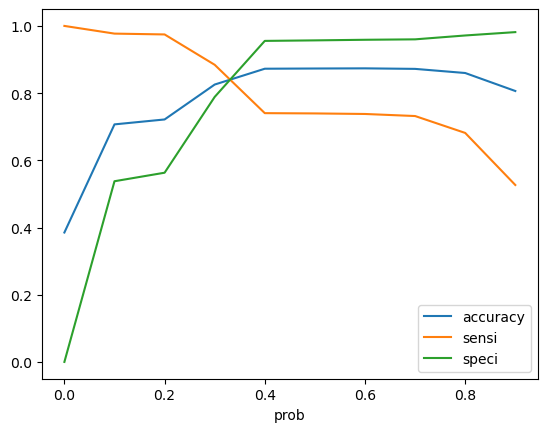

In [206]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## Observation:


In [207]:
# From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.354937,3009,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.078443,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.002070,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.900427,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.982399,7987,1,1,1,1,1,1,1,1,1,1,1,1


## Assigning Lead Score

In [208]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.354937,3009,0,1,1,1,1,0,0,0,0,0,0,1,35
1,0,0.078443,1012,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.002070,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.900427,4750,1,1,1,1,1,1,1,1,1,1,1,1,90
4,1,0.982399,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [209]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [210]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.884300899427637

In [211]:
# Let us calculate specificity
TN / float(TN+FP)

0.7884763124199744

In [212]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2115236875800256


In [213]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9158239143367043


## Precision and Recall

In [214]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3737,  168],
       [ 637, 1809]])

In [215]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9150227617602428

In [216]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7395748160261651

In [217]:
from sklearn.metrics import precision_score, recall_score

In [218]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9150227617602428

In [219]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7395748160261651

## Precision and Recall Tradeoff

In [220]:
from sklearn.metrics import precision_recall_curve

In [221]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [222]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

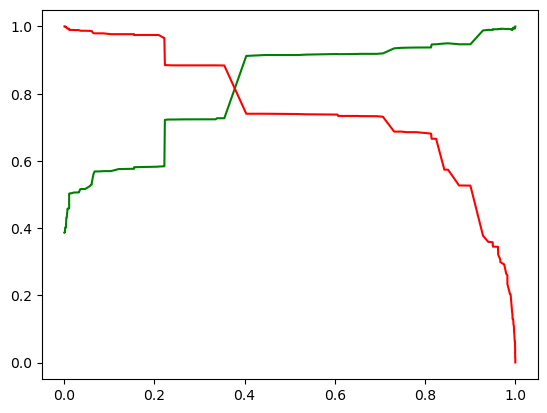

In [223]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [224]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [226]:
X_test = X_test[col2]
X_test.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Other_Activity,Specialization_Other_Specialization,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,1,1,0,0,0,0,1,0,0
1490,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7936,0,0,0,0,0,1,1,0,0,0,0,1,0,0
4216,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3830,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [227]:
X_test_sm = sm.add_constant(X_test)

In [228]:
y_test_pred = res.predict(X_test_sm)

In [229]:
y_test_pred[:10]

3271    0.222097
1490    0.850862
7936    0.222097
4216    0.999927
3830    0.354937
1800    0.850862
6507    0.061648
4821    0.003929
4223    0.961908
4714    0.222097
dtype: float64

In [230]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [231]:
# Let's see the head
y_pred_1.head()

,0
3271,0.222097
1490,0.850862
7936,0.222097
4216,0.999927
3830,0.354937


In [232]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [233]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [234]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [235]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [236]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.222097
1,1,1490,0.850862
2,0,7936,0.222097
3,1,4216,0.999927
4,0,3830,0.354937


In [237]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [238]:
# Rearranging the columns
columns_titles = ['Prospect ID','Converted','Converted_prob']
y_pred_final=y_pred_final.reindex(columns=columns_titles)

In [239]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.222097
1,1490,1,0.850862
2,7936,0,0.222097
3,4216,1,0.999927
4,3830,0,0.354937


In [240]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

In [241]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.222097,0
1,1490,1,0.850862,1
2,7936,0,0.222097,0
3,4216,1,0.999927,1
4,3830,0,0.354937,1


## Let's check the overall Accuracy.

In [242]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.816746235769372

In [243]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1367,  367],
       [ 132,  857]])

In [244]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

## Let's Calculate Sensitivity of our Logistic Regression Model

In [245]:
TP / float(TP+FN)

0.8665318503538928

## Let's Calculate Specificity of Model

In [246]:
TN / float(TN+FP)

0.7883506343713956

## Observations:

### After running the model on the Train Dataset these are the figures we obtain:
### Accuracy : 89.98%
### Sensitivity : 81.80%
### Specificity : 94.96%

### After running the model on the Test Dataset these are the figures we obtain:
### Accuracy : 83.37%
### Sensitivity : 85.52%
### Specificity : 91.58%